In [180]:
import numpy as np # Import all required libraries
import pandas as pd
from sklearn.linear_model import LinearRegression as LR
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [181]:
train_data=pd.read_csv('train11.csv') # read the data (train_data)

In [182]:
test_data=pd.read_csv('test11.csv') # read the data (test_data)

In [183]:
train_data.shape, test_data.shape

((30000, 24), (20000, 23))

In [184]:
train_data

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.41,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.88,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,NaN,Low,Working,Sales staff,Urban,81410.08,...,NaN,0,Active,959,NaN,1,Rural,1,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.71,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1,168194.47,99766.87


In [185]:
for i in train_data.columns:
    print(train_data[i].value_counts())

C-2067     1
C-25954    1
C-882      1
C-39605    1
C-28614    1
          ..
C-21805    1
C-33602    1
C-29799    1
C-19865    1
C-19406    1
Name: Customer ID, Length: 30000, dtype: int64
Ulrike Lenhardt     1
Elva Strother       1
Elidia Verde        1
Damaris Shepherd    1
Sherrie Wolken      1
                   ..
Araceli Granado     1
Ned Conine          1
Brendan Delapaz     1
Ferne Malloy        1
Delsie Liechty      1
Name: Name, Length: 30000, dtype: int64
M    15053
F    14894
Name: Gender, dtype: int64
18    4378
65    1349
64     813
61     787
62     784
60     774
63     712
57     538
47     536
44     523
23     520
45     519
34     518
28     517
50     515
58     514
41     514
26     513
27     511
21     510
38     509
42     508
56     507
53     507
24     503
39     502
30     501
20     499
36     495
55     493
43     492
29     492
59     492
32     492
33     491
48     489
52     484
46     484
51     482
19     482
31     480
37     478
35     476
25    

In [186]:
train_data.isnull().sum() # check the nan value

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     172
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                      0
Property Price                    0
Loan Sanction Amount (USD)      340
dtype: int64

In [187]:
train_data.info() # information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

In [188]:
train_data.describe() # description about data like mean, maximum, minimum values etc.

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,2.542400e+04,30000.000000,29828.000000,27507.000000,28297.000000,30000.000000,30000.000000,2.515000e+04,30000.000000,30000.000000,3.000000e+04,29660.000000
mean,40.092300,2.630574e+03,88826.333855,400.936876,2.253027,739.885381,0.193933,501.934700,2.631119e+03,2.460067,-4.743867,1.317597e+05,47649.342208
std,16.045129,1.126272e+04,59536.949605,242.545375,0.951162,72.163846,0.395384,288.158086,1.132268e+04,1.118562,74.614593,9.354955e+04,48221.146686
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.650457e+03,41177.755000,247.667500,2.000000,681.880000,0.000000,251.000000,1.650450e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,3.090593e+03,119964.605000,521.292500,3.000000,799.120000,0.000000,751.000000,3.091408e+03,3.000000,1.000000,1.788807e+05,74261.250000
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


<AxesSubplot:>

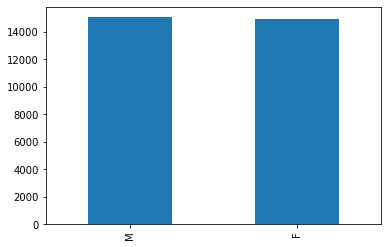

In [189]:
# Gender (visualization of Gender count)
train_data['Gender'].value_counts().plot(kind='bar') 

In [190]:
train_data['Gender'].fillna(train_data['Gender'].mode()[0],inplace=True) # fill nan value

In [191]:
# Income
train_data['Income (USD)'].fillna(train_data['Income (USD)'].median(),inplace=True) # fill nan value

<AxesSubplot:>

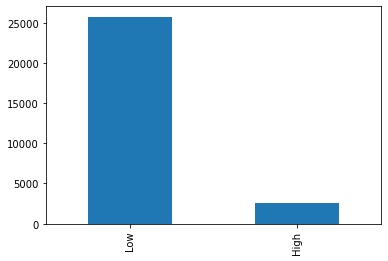

In [192]:
# Income stability
train_data['Income Stability'].value_counts().plot(kind='bar') # visualization of income stability

In [193]:
train_data['Income Stability'].fillna(train_data['Income Stability'].mode()[0],inplace=True) # fill nan value

<AxesSubplot:>

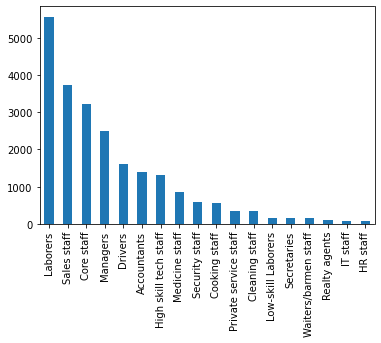

In [194]:
# Type of Employement
train_data['Type of Employment'].value_counts().plot(kind='bar') # visualization of type of employement

In [195]:
train_data['Type of Employment'].fillna(train_data['Type of Employment'].mode()[0],inplace=True) # fill nan value

In [196]:
# Current load expences
train_data['Current Loan Expenses (USD)'].fillna(train_data['Current Loan Expenses (USD)'].median(),inplace=True) # fill nan value

In [197]:
# depedents
train_data['Dependents'].fillna(train_data['Dependents'].median(),inplace=True) # fill nan value

In [198]:
# Credit Score
train_data['Credit Score'].fillna(train_data['Credit Score'].median(),inplace=True) # fill nan value

<AxesSubplot:>

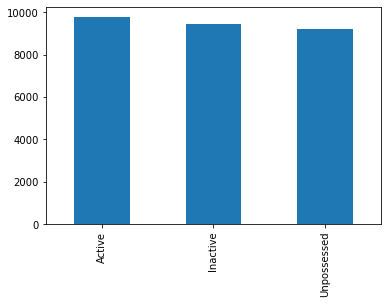

In [199]:
# Has Active Credit Card
train_data['Has Active Credit Card'].value_counts().plot(kind='bar') # visualization of 'Has Active Credit Card'

In [200]:
train_data['Has Active Credit Card'].fillna(train_data['Has Active Credit Card'].mode()[0],inplace=True) # fill nan value

In [201]:
# Property Age
train_data['Property Age'].fillna(train_data['Property Age'].median(),inplace=True)

<AxesSubplot:>

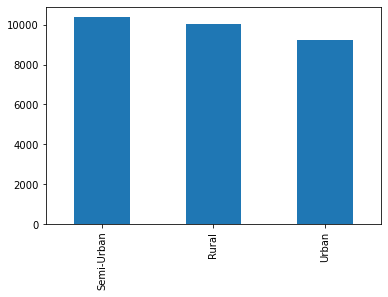

In [202]:
# Property Location
train_data['Property Location'].value_counts().plot(kind='bar')

In [203]:
train_data['Property Location'].fillna(train_data['Property Location'].mode()[0],inplace=True)

In [204]:
# Loan Sanction Amount (USD)

In [205]:
train_data['Loan Sanction Amount (USD)'].fillna(train_data['Loan Sanction Amount (USD)'].median(),inplace=True)

In [206]:
train_data.isnull().sum() # After placing nan value check if any 'nan' value is remaining 

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
Loan Sanction Amount (USD)     0
dtype: int64

In [207]:
train_data.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,3.000000e+04,30000.000000
mean,40.092300,2.568320e+03,88826.333855,400.789347,2.232000,739.881670,0.193933,501.934700,2.565181e+03,2.460067,-4.743867,1.317597e+05,47508.356140
std,16.045129,1.036924e+04,59536.949605,241.856859,0.913457,70.085603,0.395384,288.158086,1.036816e+04,1.118562,74.614593,9.354955e+04,47965.185159
min,18.000000,3.777000e+02,6048.240000,-999.000000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,-999.000000,-9.990000e+02,-999.000000
25%,25.000000,1.743305e+03,41177.755000,248.655000,2.000000,685.415000,0.000000,251.000000,1.749812e+03,1.000000,1.000000,6.057216e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,2.869142e+03,119964.605000,520.102500,3.000000,795.140000,0.000000,751.000000,2.849573e+03,3.000000,1.000000,1.788807e+05,73763.532500
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [208]:

train_data['Loan Sanction Amount (USD)']=np.where(train_data['Loan Sanction Amount (USD)']<0,np.quantile(train_data['Loan Sanction Amount (USD)'],0.25),train_data['Loan Sanction Amount (USD)'])

In [209]:
train_data['Property Price']=np.where(train_data['Property Price']<0, np.quantile(train_data['Property Price'],0.25),train_data['Property Price'])

In [210]:
train_data['Co-Applicant']=np.where(train_data['Co-Applicant']<0, np.quantile(train_data['Co-Applicant'],0.25), train_data['Co-Applicant'])

In [211]:
train_data['Current Loan Expenses (USD)']=np.where(train_data['Current Loan Expenses (USD)']<0, np.quantile(train_data['Current Loan Expenses (USD)'],0.25), train_data['Current Loan Expenses (USD)'])

In [212]:
train_data.describe()

,Age,Income (USD),Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,No. of Defaults,Property ID,Property Age,Property Type,Co-Applicant,Property Price,Loan Sanction Amount (USD)
count,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,3.000000e+04,30000.000000
mean,40.092300,2.568320e+03,88826.333855,408.150511,2.232000,739.881670,0.193933,501.934700,2.565181e+03,2.460067,0.856133,1.324821e+05,47519.611540
std,16.045129,1.036924e+04,59536.949605,216.832205,0.913457,70.085603,0.395384,288.158086,1.036816e+04,1.118562,0.350960,9.275588e+04,47953.916726
min,18.000000,3.777000e+02,6048.240000,33.760000,1.000000,580.000000,0.000000,1.000000,3.777000e+02,1.000000,0.000000,7.265950e+03,0.000000
25%,25.000000,1.743305e+03,41177.755000,248.658750,2.000000,685.415000,0.000000,251.000000,1.749812e+03,1.000000,1.000000,6.057221e+04,0.000000
50%,40.000000,2.222435e+03,75128.075000,375.205000,2.000000,739.820000,0.000000,504.000000,2.223250e+03,2.000000,1.000000,1.099936e+05,35209.395000
75%,55.000000,2.869142e+03,119964.605000,520.102500,3.000000,795.140000,0.000000,751.000000,2.849573e+03,3.000000,1.000000,1.788807e+05,73763.532500
max,65.000000,1.777460e+06,621497.820000,3840.880000,14.000000,896.260000,1.000000,999.000000,1.777460e+06,4.000000,1.000000,1.077967e+06,481907.320000


In [213]:
train_data

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.050,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,Active,746,1933.05,4,Rural,1.0,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.910,Low,Working,Laborers,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1.0,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.190,High,Pensioner,Laborers,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0.0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,2222.435,High,Pensioner,Laborers,Rural,80057.92,...,832.70,1,Unpossessed,890,2223.25,2,Semi-Urban,1.0,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.770,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1.0,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,M,38,4969.410,Low,Commercial associate,Managers,Urban,76657.90,...,869.61,0,Unpossessed,566,4969.41,4,Urban,1.0,111096.56,68992.11
29996,C-32511,Silas Slaugh,M,20,1606.880,Low,Working,Laborers,Semi-Urban,66595.14,...,729.41,0,Inactive,175,1606.88,3,Urban,1.0,73453.94,46616.60
29997,C-5192,Carmelo Lone,F,49,2222.435,Low,Working,Sales staff,Urban,81410.08,...,739.82,0,Active,959,2223.25,1,Rural,1.0,102108.02,61057.56
29998,C-12172,Carolann Osby,M,38,2417.710,Low,Working,Security staff,Semi-Urban,142524.10,...,677.27,1,Unpossessed,375,2417.71,4,Urban,1.0,168194.47,99766.87


In [214]:
train_data['Gender']=pd.get_dummies(train_data['Gender'])


In [215]:
train_data['Income Stability']=pd.get_dummies(train_data['Income Stability'])

In [216]:
train_data['Profession']=pd.get_dummies(train_data['Profession'])

In [217]:
train_data['Type of Employment']=pd.get_dummies(train_data['Type of Employment'])

In [218]:
train_data['Location']=pd.get_dummies(train_data['Location'])

In [219]:
train_data['Expense Type 1']=pd.get_dummies(train_data['Expense Type 1'])


In [220]:
train_data['Expense Type 2']=pd.get_dummies(train_data['Expense Type 2'])


In [221]:
train_data['Has Active Credit Card']=pd.get_dummies(train_data['Has Active Credit Card'])

In [222]:
train_data['Property Location']=pd.get_dummies(train_data['Property Location'])

In [223]:
train_data

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,1,56,1933.050,0,0,0,0,72809.58,...,809.44,0,1,746,1933.05,4,1,1.0,119933.46,54607.18
1,C-33999,America Calderone,0,32,4952.910,0,0,0,0,46837.47,...,780.40,0,0,608,4952.91,2,1,1.0,54791.00,37469.98
2,C-3770,Rosetta Verne,1,65,988.190,1,0,0,0,45593.04,...,833.15,0,0,546,988.19,2,0,0.0,72440.58,36474.43
3,C-26480,Zoe Chitty,1,65,2222.435,1,0,0,1,80057.92,...,832.70,1,0,890,2223.25,2,0,1.0,121441.51,56040.54
4,C-23459,Afton Venema,1,31,2614.770,0,0,0,0,113858.89,...,745.55,1,1,715,2614.77,4,0,1.0,208567.91,74008.28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,C-43723,Angelyn Clevenger,0,38,4969.410,0,0,0,0,76657.90,...,869.61,0,0,566,4969.41,4,0,1.0,111096.56,68992.11
29996,C-32511,Silas Slaugh,0,20,1606.880,0,0,0,0,66595.14,...,729.41,0,0,175,1606.88,3,0,1.0,73453.94,46616.60
29997,C-5192,Carmelo Lone,1,49,2222.435,0,0,0,0,81410.08,...,739.82,0,1,959,2223.25,1,1,1.0,102108.02,61057.56
29998,C-12172,Carolann Osby,0,38,2417.710,0,0,0,0,142524.10,...,677.27,1,0,375,2417.71,4,0,1.0,168194.47,99766.87


In [224]:
train_data.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

In [225]:
train_data.corr()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
Gender,1.000000,-0.004819,-0.005496,-0.005944,-0.008108,-0.000836,0.003985,-0.000107,0.006960,-0.000571,...,-0.001528,0.000600,0.007777,0.002969,-0.005416,-0.004484,-0.001275,-0.004417,0.001495,0.002210
Age,-0.004819,1.000000,-0.009473,0.445679,0.001480,-0.034219,0.009997,-0.010450,-0.027628,0.044729,...,0.125900,0.003573,-0.009724,-0.012358,-0.009571,0.002196,-0.006532,-0.123143,-0.010137,0.008152
Income (USD),-0.005496,-0.009473,1.000000,-0.012029,0.003038,0.003418,-0.012210,0.045981,0.055787,-0.019174,...,0.011856,-0.002048,-0.001995,-0.007457,0.999886,0.008984,-0.003400,0.003655,0.046754,0.033818
Income Stability,-0.005944,0.445679,-0.012029,1.000000,-0.002497,-0.067131,0.012909,-0.014013,-0.049672,0.097006,...,0.272507,0.002824,-0.011969,0.004979,-0.011954,0.009320,-0.008547,-0.236991,-0.012326,0.040769
Profession,-0.008108,0.001480,0.003038,-0.002497,1.000000,-0.001792,-0.003799,-0.000580,0.001597,-0.010898,...,0.004645,-0.004005,0.010476,-0.003894,0.003041,0.003941,-0.005791,0.003347,-0.000467,0.002626
Type of Employment,-0.000836,-0.034219,0.003418,-0.067131,-0.001792,1.000000,-0.009310,0.047235,0.039472,-0.006038,...,0.091546,-0.001785,0.003242,-0.009033,0.003388,-0.001058,-0.000523,0.027391,0.045565,0.056054
Location,0.003985,0.009997,-0.012210,0.012909,-0.003799,-0.009310,1.000000,-0.028023,-0.033574,0.014928,...,-0.086077,0.015603,-0.008490,-0.003307,-0.012061,0.000324,-0.009720,-0.004480,-0.027856,-0.039846
Loan Amount Request (USD),-0.000107,-0.010450,0.045981,-0.014013,-0.000580,0.047235,-0.028023,1.000000,0.757141,-0.096134,...,0.173332,0.000088,0.025885,-0.008426,0.045425,0.003802,-0.004343,0.021872,0.956069,0.721355
Current Loan Expenses (USD),0.006960,-0.027628,0.055787,-0.049672,0.001597,0.039472,-0.033574,0.757141,1.000000,-0.125071,...,0.119790,0.000467,0.004829,-0.009440,0.055109,0.014172,-0.001153,0.028319,0.724669,0.539496
Expense Type 1,-0.000571,0.044729,-0.019174,0.097006,-0.010898,-0.006038,0.014928,-0.096134,-0.125071,1.000000,...,0.046774,-0.006893,-0.007302,0.000366,-0.018802,-0.009919,-0.002197,-0.018753,-0.091802,-0.055359


 According to domain research the variable which make significant difference on target variable , so take train and valid data
 from train_data and then make prediction on test data.
 Here we try linear regression and Random Forest Regressor . After training data using Random Forest Regressor we got less error as compared Linear Regression .
 So we considerd Random Forest Regressor a final model
 

In [226]:
x=train_data[['Age','Income (USD)','Loan Amount Request (USD)','Property Price','Current Loan Expenses (USD)','Credit Score','Property Age','Has Active Credit Card','Co-Applicant']]
y=train_data['Loan Sanction Amount (USD)']

In [227]:
from sklearn.model_selection import train_test_split
train_x,valid_x,train_y,valid_y=train_test_split(x,y,test_size=0.2,random_state=40)

In [228]:
train_x.shape,train_y.shape

((24000, 9), (24000,))

Linear Regression

In [229]:
lr=LR()
lr.fit(train_x,train_y)

LinearRegression()

In [230]:
from sklearn.metrics import mean_absolute_error as mae

In [231]:
train_predict=lr.predict(train_x)
print(mae(train_predict,train_y))

19618.727127813574


In [232]:
valid_predict=lr.predict(valid_x)
print(mae(valid_predict,valid_y))

19641.55986680002


In [233]:
lr.coef_

array([ 3.59847878e+01,  4.04473197e+00,  5.63599237e-01, -2.34145732e-03,
       -4.39870737e+00,  1.55662591e+02, -4.04451549e+00, -3.27568216e+01,
        3.25206265e+04])

Text(0.5, 1.0, 'cofficient plot')

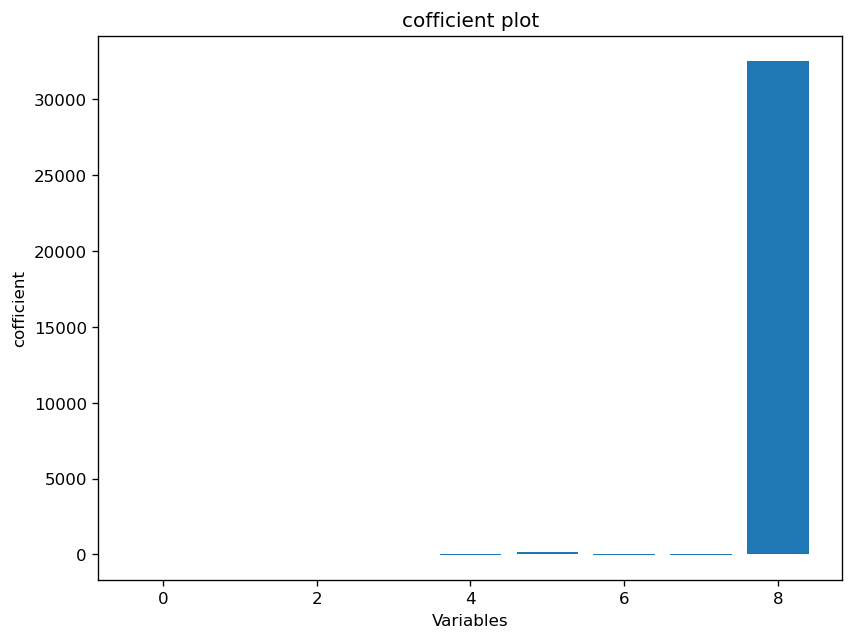

In [234]:
plt.figure(figsize=(8,6),dpi=120,facecolor='w',edgecolor='b')
x=range(len(train_x.columns))
y=lr.coef_
plt.bar(x,y)
plt.xlabel('Variables')
plt.ylabel('cofficient')
plt.title('cofficient plot')


Grid Search CV

In [235]:
model=RandomForestRegressor()

n_estimators=[10,50,100,150,200,250,300]
max_features=['sqrt','log2']
max_depth=range(2,10)
param_grid=dict(n_estimators=n_estimators,max_features=max_features,max_depth=max_depth)
grid_search=GridSearchCV(model,param_grid,n_jobs=-1,cv=5)
result=grid_search.fit(train_x,train_y)
print("Best score using RandomForest: %f with %s"%(result.best_score_*100,result.best_params_))

Best score using RandomForest: 75.405587 with {'max_depth': 9, 'max_features': 'log2', 'n_estimators': 150}


Random Forest Regressor

In [284]:
rf=RandomForestRegressor(max_depth=9,max_features='log2',n_estimators=150)
rf.fit(train_x,train_y)

RandomForestRegressor(max_depth=9, max_features='log2', n_estimators=150)

In [285]:
train_predict=rf.predict(train_x)
print(mae(train_predict,train_y))

11683.784201072935


In [286]:
valid_predict=rf.predict(valid_x)
print(mae(valid_predict,valid_y))

12806.827370917232


In [287]:
mod = sm.OLS(train_y,train_x)
res=mod.fit()
print(res.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Loan Sanction Amount (USD)   R-squared (uncentered):                   0.778
Model:                                    OLS   Adj. R-squared (uncentered):              0.778
Method:                         Least Squares   F-statistic:                              9333.
Date:                        Sat, 26 Jun 2021   Prob (F-statistic):                        0.00
Time:                                21:38:30   Log-Likelihood:                     -2.8292e+05
No. Observations:                       24000   AIC:                                  5.659e+05
Df Residuals:                           23991   BIC:                                  5.659e+05
Df Model:                                   9                                                  
Covariance Type:                    nonrobust                                                  
                                  coef  

Test data on which we have to predict :-

In [288]:
test_data

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,1,47,3472.69,0,1,0,0,137088.98,...,2.0,799.14,0,0,843,3472.69,2,0,1.0,236644.50
1,C-35067,Jeannette Cha,1,57,1184.84,0,0,0,1,104771.59,...,2.0,833.31,0,0,22,1184.84,1,1,1.0,142357.30
2,C-34590,Keva Godfrey,1,52,1266.27,0,0,0,0,176684.91,...,3.0,627.44,0,0,1,1266.27,1,0,1.0,300991.24
3,C-16668,Elva Sackett,0,65,1369.72,1,0,0,1,97009.18,...,2.0,833.20,0,0,730,1369.72,1,0,0.0,125612.10
4,C-12196,Sade Constable,1,60,1939.23,1,0,0,0,109980.00,...,2.0,739.30,0,1,356,1939.23,4,0,1.0,180908.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,1,19,1349.60,0,1,0,0,156766.97,...,4.0,684.32,0,0,681,1349.60,4,0,1.0,212778.00
19996,C-17587,Evelina Hodges,0,22,2019.78,0,0,0,0,47924.80,...,2.0,706.34,0,0,213,2019.78,4,0,1.0,90816.95
19997,C-46479,Karlyn Mckinzie,0,19,2252.03,0,0,0,0,18629.88,...,1.0,656.46,0,0,270,2252.03,2,1,0.0,21566.27
19998,C-3099,Mariana Pulver,1,21,1845.35,0,0,0,0,95430.73,...,2.0,865.46,0,0,489,1845.35,1,0,1.0,120281.17


In [289]:
test_data.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [290]:
test_data['Gender'].value_counts()


1    10173
0     9827
Name: Gender, dtype: int64

<AxesSubplot:>

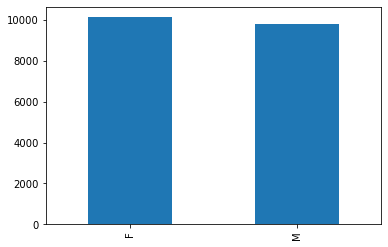

In [243]:
test_data['Gender'].value_counts().plot(kind='bar')

Place missing value

In [244]:
test_data['Gender'].fillna(test_data['Gender'].mode()[0],inplace=True)

In [245]:
test_data['Income (USD)'].fillna(test_data['Income (USD)'].median(),inplace=True)

<AxesSubplot:>

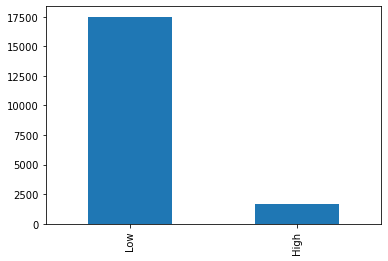

In [246]:
test_data['Income Stability'].value_counts().plot(kind='bar')

In [247]:
test_data['Income Stability'].fillna(test_data['Income Stability'].mode()[0],inplace=True)

<AxesSubplot:>

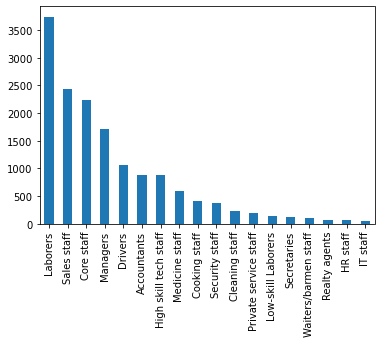

In [248]:
test_data['Type of Employment'].value_counts().plot(kind='bar')

In [249]:
test_data['Type of Employment'].fillna(test_data['Type of Employment'].mode()[0],inplace=True)

In [250]:
test_data['Current Loan Expenses (USD)'].fillna(test_data['Current Loan Expenses (USD)'].median(),inplace=True)

In [251]:
test_data['Dependents'].fillna(test_data['Dependents'].median(),inplace=True)

In [252]:
test_data['Credit Score'].fillna(test_data['Credit Score'].median(),inplace=True)

<AxesSubplot:>

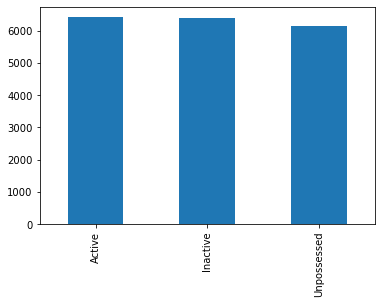

In [253]:
test_data['Has Active Credit Card'].value_counts().plot(kind='bar')

In [254]:
test_data['Has Active Credit Card'].fillna(test_data['Has Active Credit Card'].mode()[0],inplace=True)

In [255]:
test_data['Property Age'].fillna(test_data['Property Age'].median(),inplace=True)

In [256]:
test_data['Property Location'].fillna(test_data['Property Location'].mode()[0],inplace=True)

In [257]:
test_data.isnull().sum() # check if any missing value

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [258]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 23 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  20000 non-null  object 
 1   Name                         20000 non-null  object 
 2   Gender                       20000 non-null  object 
 3   Age                          20000 non-null  int64  
 4   Income (USD)                 20000 non-null  float64
 5   Income Stability             20000 non-null  object 
 6   Profession                   20000 non-null  object 
 7   Type of Employment           20000 non-null  object 
 8   Location                     20000 non-null  object 
 9   Loan Amount Request (USD)    20000 non-null  float64
 10  Current Loan Expenses (USD)  20000 non-null  float64
 11  Expense Type 1               20000 non-null  object 
 12  Expense Type 2               20000 non-null  object 
 13  Dependents      

In [259]:
train_data.info() # Information about test_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       30000 non-null  uint8  
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 30000 non-null  float64
 5   Income Stability             30000 non-null  uint8  
 6   Profession                   30000 non-null  uint8  
 7   Type of Employment           30000 non-null  uint8  
 8   Location                     30000 non-null  uint8  
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  30000 non-null  float64
 11  Expense Type 1               30000 non-null  uint8  
 12  Expense Type 2               30000 non-null  uint8  
 13  Dependents      

Replace '?' with 'nan' value of some columns

In [260]:
test_data['Property Price'].replace({'?':np.nan},inplace=True)

In [261]:
test_data['Property Price'].fillna(test_data['Property Price'].median(),inplace=True)

In [262]:
test_data['Property Price']=test_data['Property Price'].astype('float64')

In [263]:
test_data['Co-Applicant'].replace({'?':np.nan},inplace=True)

In [264]:
test_data['Co-Applicant'].fillna(test_data['Co-Applicant'].median(),inplace=True)

In [265]:
test_data['Co-Applicant']=test_data['Co-Applicant'].astype('float64')

In [266]:
test_data['Property Location']=pd.get_dummies(test_data['Property Location'])

In [267]:
test_data['Has Active Credit Card']=pd.get_dummies(test_data['Has Active Credit Card'])

In [268]:
test_data['Location']=pd.get_dummies(test_data['Location'])

In [269]:
test_data['Type of Employment']=pd.get_dummies(test_data['Type of Employment'])

In [270]:
test_data['Profession']=pd.get_dummies(test_data['Profession'])

In [271]:
test_data['Income Stability']=pd.get_dummies(test_data['Income Stability'])


In [272]:
test_data['Gender']=pd.get_dummies(test_data['Gender'])


In [273]:
test_data['Expense Type 1']=pd.get_dummies(test_data['Expense Type 1'])


In [274]:
test_data['Expense Type 2']=pd.get_dummies(test_data['Expense Type 2'])

In [275]:
test_data

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,1,47,3472.69,0,1,0,0,137088.98,...,2.0,799.14,0,0,843,3472.69,2,0,1.0,236644.50
1,C-35067,Jeannette Cha,1,57,1184.84,0,0,0,1,104771.59,...,2.0,833.31,0,0,22,1184.84,1,1,1.0,142357.30
2,C-34590,Keva Godfrey,1,52,1266.27,0,0,0,0,176684.91,...,3.0,627.44,0,0,1,1266.27,1,0,1.0,300991.24
3,C-16668,Elva Sackett,0,65,1369.72,1,0,0,1,97009.18,...,2.0,833.20,0,0,730,1369.72,1,0,0.0,125612.10
4,C-12196,Sade Constable,1,60,1939.23,1,0,0,0,109980.00,...,2.0,739.30,0,1,356,1939.23,4,0,1.0,180908.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,C-9076,Tobias Davilla,1,19,1349.60,0,1,0,0,156766.97,...,4.0,684.32,0,0,681,1349.60,4,0,1.0,212778.00
19996,C-17587,Evelina Hodges,0,22,2019.78,0,0,0,0,47924.80,...,2.0,706.34,0,0,213,2019.78,4,0,1.0,90816.95
19997,C-46479,Karlyn Mckinzie,0,19,2252.03,0,0,0,0,18629.88,...,1.0,656.46,0,0,270,2252.03,2,1,0.0,21566.27
19998,C-3099,Mariana Pulver,1,21,1845.35,0,0,0,0,95430.73,...,2.0,865.46,0,0,489,1845.35,1,0,1.0,120281.17


In [276]:
test_data.describe()

,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),Current Loan Expenses (USD),Expense Type 1,...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,0.508650,39.940500,2525.280192,0.084300,0.262350,0.044300,0.171800,88859.076706,408.319340,0.640800,...,2.236900,738.839313,0.189500,0.374700,501.024500,2520.120036,2.47190,0.338400,0.854050,133276.701905
std,0.499938,16.097618,1390.372931,0.277844,0.439923,0.205766,0.377216,60007.333673,215.409556,0.479778,...,0.927373,71.048813,0.391915,0.484057,287.537722,1378.259791,1.12551,0.473177,0.353065,92964.883807
min,0.000000,18.000000,368.590000,0.000000,0.000000,0.000000,0.000000,6185.480000,41.370000,0.000000,...,1.000000,580.040000,0.000000,0.000000,1.000000,368.590000,1.00000,0.000000,0.000000,7353.490000
25%,0.000000,25.000000,1678.365000,0.000000,0.000000,0.000000,0.000000,40889.030000,251.345000,0.000000,...,2.000000,682.487500,0.000000,0.000000,252.000000,1681.232500,1.00000,0.000000,1.000000,62065.917500
50%,1.000000,40.000000,2224.590000,0.000000,0.000000,0.000000,0.000000,74565.990000,374.000000,1.000000,...,2.000000,739.300000,0.000000,0.000000,501.000000,2220.605000,2.00000,0.000000,1.000000,110871.825000
75%,1.000000,55.000000,3047.982500,0.000000,1.000000,0.000000,0.000000,120068.852500,518.795000,1.000000,...,3.000000,795.210000,0.000000,1.000000,748.000000,3040.525000,3.00000,1.000000,1.000000,179270.697500
max,1.000000,65.000000,30427.680000,1.000000,1.000000,1.000000,1.000000,576335.680000,3305.970000,1.000000,...,13.000000,893.830000,1.000000,1.000000,999.000000,30427.680000,4.00000,1.000000,1.000000,816375.090000


In [277]:
test_data.head(5)

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Dependents,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price
0,C-26247,Tandra Olszewski,1,47,3472.69,0,1,0,0,137088.98,...,2.0,799.14,0,0,843,3472.69,2,0,1.0,236644.50
1,C-35067,Jeannette Cha,1,57,1184.84,0,0,0,1,104771.59,...,2.0,833.31,0,0,22,1184.84,1,1,1.0,142357.30
2,C-34590,Keva Godfrey,1,52,1266.27,0,0,0,0,176684.91,...,3.0,627.44,0,0,1,1266.27,1,0,1.0,300991.24
3,C-16668,Elva Sackett,0,65,1369.72,1,0,0,1,97009.18,...,2.0,833.20,0,0,730,1369.72,1,0,0.0,125612.10
4,C-12196,Sade Constable,1,60,1939.23,1,0,0,0,109980.00,...,2.0,739.30,0,1,356,1939.23,4,0,1.0,180908.00


In [278]:
test_x=test_data[['Age','Income (USD)','Loan Amount Request (USD)','Property Price','Current Loan Expenses (USD)','Credit Score','Property Age','Has Active Credit Card','Co-Applicant']]

In [279]:
test_x

,Age,Income (USD),Loan Amount Request (USD),Property Price,Current Loan Expenses (USD),Credit Score,Property Age,Has Active Credit Card,Co-Applicant
0,47,3472.69,137088.98,236644.50,396.72,799.14,3472.69,0,1.0
1,57,1184.84,104771.59,142357.30,463.76,833.31,1184.84,0,1.0
2,52,1266.27,176684.91,300991.24,493.15,627.44,1266.27,0,1.0
3,65,1369.72,97009.18,125612.10,446.15,833.20,1369.72,0,0.0
4,60,1939.23,109980.00,180908.00,370.10,739.30,1939.23,1,1.0
...,...,...,...,...,...,...,...,...,...
19995,19,1349.60,156766.97,212778.00,500.59,684.32,1349.60,0,1.0
19996,22,2019.78,47924.80,90816.95,243.02,706.34,2019.78,0,1.0
19997,19,2252.03,18629.88,21566.27,101.88,656.46,2252.03,0,0.0
19998,21,1845.35,95430.73,120281.17,271.31,865.46,1845.35,0,1.0


Predict the test data

In [291]:
test_pred=rf.predict(test_x)

In [292]:
d={'Customer ID':test_data['Customer ID'],'Loan Sanction Amount (USD)':test_pred}
sample_sumb=pd.DataFrame(data=d)

In [293]:
sample_sumb

,Customer ID,Loan Sanction Amount (USD)
0,C-26247,85954.821678
1,C-35067,61273.852028
2,C-34590,3823.935393
3,C-16668,51186.067674
4,C-12196,67480.509672
...,...,...
19995,C-9076,95394.995823
19996,C-17587,31012.732066
19997,C-46479,2423.860025
19998,C-3099,62876.233729


Save the csv file

In [294]:
sample_sumb.to_csv('sample_submission.csv')